In [1]:
import pandas as pd
import numpy as np

## We are doing Singular Value Decomposition (SVD)
### It is based on linear algebra concept of Matrix decomposition where A can be decomposed as A= PDP(Inverse) where P is invertible matrix and D is diagonal matrix

In [3]:
df=pd.read_csv('./svd_pca/MyFoodRatings.csv')

In [5]:
df.head()

,Name,Chicken,Mutton,Paneer,ChowMein,SpringRolls,Momo,Sushi,Ramen,Tempura
0,A,5,5,5,0,0,0,0,0,0
1,B,4,4,4,0,0,0,0,0,0
2,C,3,3,3,0,0,0,0,0,0
3,D,2,2,2,0,0,0,0,0,0
4,E,0,0,0,2,2,2,0,0,0


#### We are going to remove the users attribute i.e. Name as we will be using the complete numerical table

In [8]:
df.drop(columns=['Name'],inplace=True)

In [14]:
df.shape

(12, 9)

In [9]:
U,s,VT=np.linalg.svd(df,full_matrices=True)

In [18]:
print("Type of U, s & VT is : {} {} {} ".format(type(U),type(s),type(VT)))
print("Shape of U, s & VT is : {} {} {} ".format(U.shape,s.shape,VT.shape))

Type of U, s & VT is : <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> 
Shape of U, s & VT is : (12, 12) (9,) (9, 9) 


In [23]:
#Checks if both the array are equal within a tollerance
np.allclose(df, np.dot(U*s,VT))

True

In [21]:
print("Type of U, s & VT is : {} {} {} ".format(type(U),type(s),type(VT)))
print("Shape of U, s & VT is : {} {} {} ".format(U.shape,s.shape,VT.shape))

Type of U, s & VT is : <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> 
Shape of U, s & VT is : (12, 9) (9,) (9, 9) 


In [32]:
np.diag(s[:3])

array([[12.72792206,  0.        ,  0.        ],
       [ 0.        , 10.57703788,  0.        ],
       [ 0.        ,  0.        ,  8.84826058]])

The reason why the Japanese food have lowest weight
The reason if first 3 columns have 100% correlation 
2nd highest between 4,5 & 6 column follwed by last 3 col


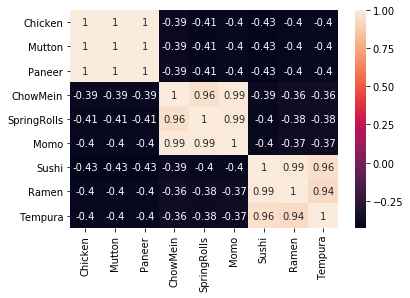

In [41]:
%matplotlib inline
import seaborn as sns
print("The reason why the Japanese food have lowest weight\nThe reason if first 3 columns have 100% correlation \n2nd highest\
 between 4,5 & 6 column follwed by last 3 col")
sns.heatmap(df.corr(),annot=True)

In [45]:
pd.DataFrame(VT[:3])

,0,1,2,3,4,5,6,7,8
0,-0.57735,-0.57735,-0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.00000,-0.637875,-0.512261,-0.575068,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,-0.476163,-0.557638,-0.679933


### Exercise 2 on FoodRatings_all_same_5.csv

In [51]:
df=pd.read_csv('./svd_pca/FoodRatings_all_same_5.csv')
df.head(10)

,Name,Chicken,Mutton,Paneer,ChowMein,SpringRolls,Momo,Sushi,Ramen,Tempura
0,A,5,5,5,0,0,0,0,0,0
1,B,5,5,5,0,0,0,0,0,0
2,C,5,5,5,0,0,0,0,0,0
3,D,5,5,5,0,0,0,0,0,0
4,E,0,0,0,5,5,5,0,0,0
5,F,0,0,0,5,5,5,0,0,0
6,G,0,0,0,5,5,5,0,0,0
7,H,0,0,0,5,5,5,0,0,0
8,I,0,0,0,0,0,0,5,5,5
9,J,0,0,0,0,0,0,5,5,5


In [52]:
df.drop(columns=['Name'], inplace=True)
u,s,vt=np.linalg.svd(df,full_matrices=True)
s[:3]

array([17.32050808, 17.32050808, 17.32050808])

In [54]:
df=pd.read_csv('./svd_pca/FoodRatings_all_same_5_4_3.csv')
df.head(10)

,Name,Chicken,Mutton,Paneer,ChowMein,SpringRolls,Momo,Sushi,Ramen,Tempura
0,A,5,5,5,0,0,0,0,0,0
1,B,5,5,5,0,0,0,0,0,0
2,C,5,5,5,0,0,0,0,0,0
3,D,5,5,5,0,0,0,0,0,0
4,E,0,0,0,4,4,4,0,0,0
5,F,0,0,0,4,4,4,0,0,0
6,G,0,0,0,4,4,4,0,0,0
7,H,0,0,0,4,4,4,0,0,0
8,I,0,0,0,0,0,0,3,3,3
9,J,0,0,0,0,0,0,3,3,3


In [55]:
df.drop(columns=['Name'],inplace=True)
u,s,vt=np.linalg.svd(df,full_matrices=True)
s[:3]

array([17.32050808, 13.85640646, 10.39230485])

## Principal Component Analysis (PCA)

In [129]:
churn_data=pd.read_csv('./svd_pca/pca_churn_data.csv',encoding='iso-8859-1')
customer_data=pd.read_csv('./svd_pca/pca_customer_data.csv',encoding='palmos')
inter_data=pd.read_csv('./svd_pca/pca_internet_data.csv',encoding='iso-8859-1')
print("churn {} customer {} internet {} ".format(churn_data.shape,customer_data.shape,inter_data.shape))

churn (7043, 9) customer (7043, 5) internet (7043, 9) 


In [130]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [132]:
inter_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [133]:
master_df=pd.merge(churn_data,customer_data,how='inner',on='customerID')
master_df=master_df.merge(inter_data,how='inner',on='customerID')
print(master_df.shape)
master_df.head()

(7043, 21)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


#### Data Preparation

In [134]:
master_df['PhoneService']=master_df['PhoneService'].map({'Yes':1,'No':0})
master_df['PaperlessBilling']=master_df['PaperlessBilling'].map({'Yes':1,'No':0})
master_df['Churn']=master_df['Churn'].map({'Yes':1,'No':0})
master_df['Partner']=master_df['Partner'].map({'Yes':1,'No':0})
master_df['Dependents']=master_df['Dependents'].map({'Yes':1,'No':0})
master_df['OnlineSecurity']=master_df['OnlineSecurity'].map({'Yes':1,'No':0})
master_df['OnlineBackup']=master_df['OnlineBackup'].map({'Yes':1,'No':0})
master_df['DeviceProtection']=master_df['DeviceProtection'].map({'Yes':1,'No':0})
master_df['TechSupport']=master_df['TechSupport'].map({'Yes':1,'No':0})
master_df['StreamingTV']=master_df['StreamingTV'].map({'Yes':1,'No':0})
master_df['StreamingMovies']=master_df['StreamingMovies'].map({'Yes':1,'No':0})

In [135]:
master_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
cont=pd.get_dummies(master_df['Contract'],prefix='Contract',drop_first=True)
master_df=pd.concat([master_df,cont],axis=1)

pay_method=pd.get_dummies(master_df['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
master_df=pd.concat([master_df,pay_method],axis=1)

gender=pd.get_dummies(master_df['gender'],prefix='gender',drop_first=True)
master_df=pd.concat([master_df,gender],axis=1)

mlt=pd.get_dummies(master_df['MultipleLines'],prefix='MultipleLines',drop_first=True)
master_df=pd.concat([master_df,mlt],axis=1)

ins=pd.get_dummies(master_df['InternetService'],prefix='InternetService',drop_first=True)
master_df=pd.concat([master_df,ins],axis=1)
master_df.drop(columns=['Contract','PaymentMethod','gender','MultipleLines','InternetService'],inplace=True)

In [137]:
master_df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [138]:
master_df.info()
#as we can see that total charges is imported as an object we need to convert it to numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
OnlineSecurity                           5517 non-null float64
OnlineBackup                             5517 non-null float64
DeviceProtection                         5517 non-null float64
TechSupport                              5517 non-null float64
StreamingTV                

In [139]:
master_df['TotalCharges']=master_df['TotalCharges'].convert_objects(convert_numeric=True)
#master_df['TotalCharges']=pd.to_numeric(master_df['TotalCharges'])
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
OnlineSecurity                           5517 non-null float64
OnlineBackup                             5517 non-null float64
DeviceProtection                         5517 non-null float64
TechSupport                              5517 non-null float64
StreamingTV               

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


#### Checking for outliers in continuous variables

In [140]:
num_tele=master_df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
num_tele.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [148]:
master_df.isnull().sum()/len(master_df.index)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
OnlineSecurity                           0.0
OnlineBackup                             0.0
DeviceProtection                         0.0
TechSupport                              0.0
StreamingTV                              0.0
StreamingMovies                          0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLi

In [142]:
master_df=master_df[~np.isnan(master_df['TotalCharges'])]
#np.isnan(master_df['TotalCharges'])

In [147]:
master_df=master_df[~np.isnan(master_df['OnlineSecurity'])]
master_df=master_df[~np.isnan(master_df['OnlineBackup'])]
master_df=master_df[~np.isnan(master_df['DeviceProtection'])]
master_df=master_df[~np.isnan(master_df['TechSupport'])]
master_df=master_df[~np.isnan(master_df['StreamingTV'])]
master_df=master_df[~np.isnan(master_df['StreamingMovies'])]

In [177]:
from sklearn.preprocessing import StandardScaler
df=master_df[['tenure','MonthlyCharges','TotalCharges']]

In [178]:
scaler=StandardScaler().fit(df)
df[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(df)

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [180]:
master_df.drop(['tenure','MonthlyCharges','TotalCharges'],inplace=True,axis=1)
pd.concat([master_df,df],axis=1)

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,-1.297888,-2.143673,-1.146123
1,5575-GNVDE,1,0,0,0,0,0,1.0,0.0,1.0,...,0,1,1,0,0,0,0,0.044524,-0.907773,-0.356619
2,3668-QPYBK,1,1,1,0,0,0,1.0,1.0,0.0,...,0,1,1,0,0,0,0,-1.257209,-1.049149,-1.112881
3,7795-CFOCW,0,0,0,0,0,0,1.0,0.0,1.0,...,0,0,1,1,0,0,0,0.491995,-1.575889,-0.377316
4,9237-HQITU,1,1,1,0,0,0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,-1.257209,-0.280702,-1.094414
5,9305-CDSKC,1,1,1,0,0,0,0.0,0.0,1.0,...,1,0,0,0,1,1,0,-1.013134,1.039567,-0.810457
6,1452-KIOVK,1,1,0,0,0,1,0.0,1.0,0.0,...,0,0,1,0,1,1,0,-0.443626,0.558433,-0.331189
7,6713-OKOMC,0,0,0,0,0,0,1.0,0.0,0.0,...,0,1,0,1,0,0,0,-0.931775,-2.148234,-1.030626
8,7892-POOKP,1,1,1,0,1,0,0.0,0.0,1.0,...,1,0,0,0,1,1,0,-0.199551,1.274434,0.134387
9,6388-TABGU,1,0,0,0,0,1,1.0,1.0,0.0,...,0,0,1,0,0,0,0,1.183540,-0.944257,0.321993


In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

(-1.1132521672369817,
 1.1571599793898104,
 -1.110586488254314,
 1.198378537335909)

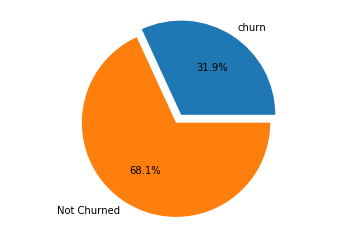

In [188]:
%matplotlib inline
plt.pie(labels=['churn','Not Churned'],autopct='%1.1f%%', explode=(.1,0),x=[len(master_df[master_df['Churn']==1]),len(master_df[master_df['Churn']==0])])
plt.axis('equal')

In [189]:
from sklearn.model_selection import train_test_split
X=master_df.drop(['Churn','customerID'],axis=1)
y=master_df['Churn']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,random_state=100,test_size=.3)

In [191]:
X_train.shape
from sklearn.decomposition import PCA

In [192]:
pca=PCA(random_state=100,svd_solver='randomized')
pca.fit(X_train)
pca.components_

array([[ 1.66646209e-03, -6.22960028e-02, -5.72101174e-02,
         3.12749747e-01,  2.03986035e-01,  3.06296147e-01,
         2.89841963e-01,  3.64641663e-01,  3.52619624e-01,
         2.91929832e-01,  2.94920946e-01,  1.10620768e-01,
         3.10406372e-01,  1.80996055e-01, -2.54381345e-01,
        -3.99344787e-02, -7.38357448e-03, -1.66646209e-03,
         1.72577551e-01, -9.27141947e-02, -0.00000000e+00],
       [-2.36606258e-01, -2.76784962e-01, -1.65828315e-01,
        -6.66874138e-02,  1.01590199e-01,  1.78457728e-01,
        -2.81648389e-02, -8.22301240e-02,  1.39112195e-01,
        -2.84170442e-01, -2.73070023e-01,  1.34799153e-02,
         5.70557372e-02,  5.37134576e-02, -2.84760661e-01,
         2.08780384e-01,  1.53387809e-02,  2.36606258e-01,
        -3.97486501e-01, -5.15609213e-01,  0.00000000e+00],
       [-3.38175979e-01,  8.77560360e-02,  1.76665203e-02,
        -1.47905057e-01, -1.18541839e-01, -1.33673367e-01,
        -1.16651652e-01,  2.04032155e-01,  4.17351076e

In [200]:
pca_df=pd.DataFrame()
x_col=X_train.columns
pca_df['Features']=x_col
for i, col in enumerate(x_col):
    k="PC"+str(i+1)
    pca_df[k]=pca.components_[i]

pca_df.head()

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,PhoneService,0.001666,-0.236606,-0.338176,-0.075948,-0.013666,0.027366,-0.200590,0.005930,0.162302,...,-0.088444,-0.110514,0.134025,0.150911,-0.411354,0.052160,0.005457,0.010843,7.071068e-01,0.0
1,PaperlessBilling,-0.062296,-0.276785,0.087756,0.001390,-0.007922,-0.132633,0.544621,-0.474776,0.228956,...,0.180083,-0.110197,-0.036067,-0.145466,-0.101495,0.007808,0.039182,-0.023170,-1.487168e-16,0.0
2,SeniorCitizen,-0.057210,-0.165828,0.017667,-0.037229,0.018896,0.029634,0.166943,0.017804,-0.322847,...,0.355303,0.402833,0.120147,0.456298,-0.096482,0.528227,0.039747,-0.006591,-1.822496e-17,0.0
3,Partner,0.312750,-0.066687,-0.147905,0.663261,0.106897,-0.160601,0.030706,-0.032485,-0.123878,...,0.214479,0.192109,0.069754,0.181504,-0.111680,-0.492042,-0.077285,0.006535,4.238821e-17,0.0
4,Dependents,0.203986,0.101590,-0.118542,0.540327,0.073686,-0.161582,-0.051941,-0.053669,0.177533,...,-0.171493,-0.149568,-0.028606,-0.162199,0.155077,0.674296,-0.006694,0.018455,-9.966768e-17,0.0


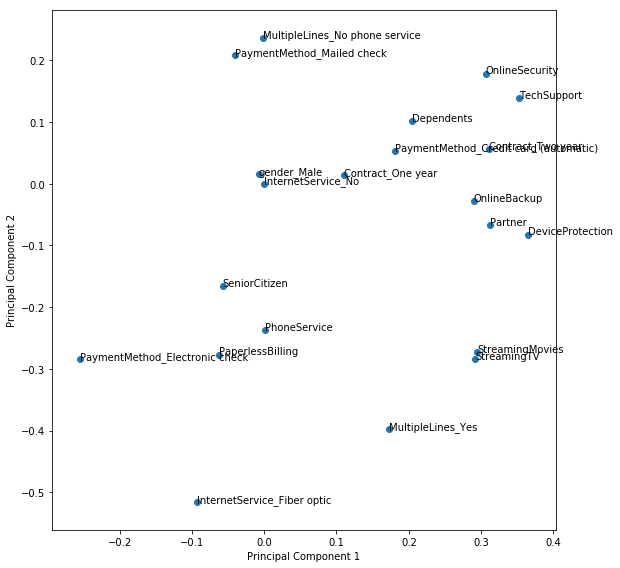

In [203]:
plt.figure(figsize=(8,8))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Features):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()

In [207]:
print(pca.explained_variance_)
pca.explained_variance_ratio_

[6.67999121e-01 5.57009729e-01 3.01915824e-01 2.68095835e-01
 2.50700545e-01 2.20130480e-01 2.13545139e-01 1.95079407e-01
 1.86975318e-01 1.74204763e-01 1.63796687e-01 1.58755361e-01
 1.52271498e-01 1.39460358e-01 1.37842022e-01 1.09571071e-01
 1.06058529e-01 5.79086901e-02 4.88006102e-02 6.97233640e-36
 0.00000000e+00]


array([1.62525415e-01, 1.35521492e-01, 7.34566757e-02, 6.52282100e-02,
       6.09959040e-02, 5.35581508e-02, 5.19559252e-02, 4.74631788e-02,
       4.54914390e-02, 4.23843394e-02, 3.98520355e-02, 3.86254716e-02,
       3.70479358e-02, 3.39309617e-02, 3.35372176e-02, 2.66588432e-02,
       2.58042353e-02, 1.40892909e-02, 1.18732783e-02, 1.69638228e-36,
       0.00000000e+00])

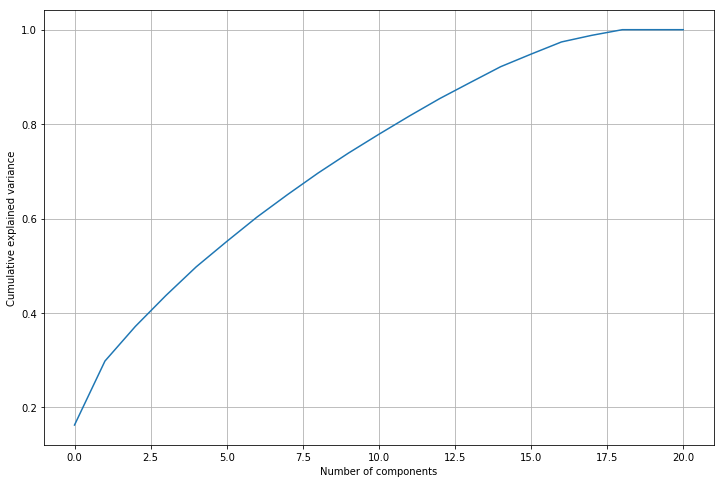

In [215]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yscale('linear')
plt.grid(b=True, which='both')

#### From above it looks like 16 components will yeild good result of 95% variance
### PCA implementation two

In [216]:
from sklearn.decomposition import IncrementalPCA


In [218]:
pca_final=IncrementalPCA(n_components=16)
df_train_pca=pca_final.fit_transform(X_train)
df_train_pca.shape

(3858, 16)

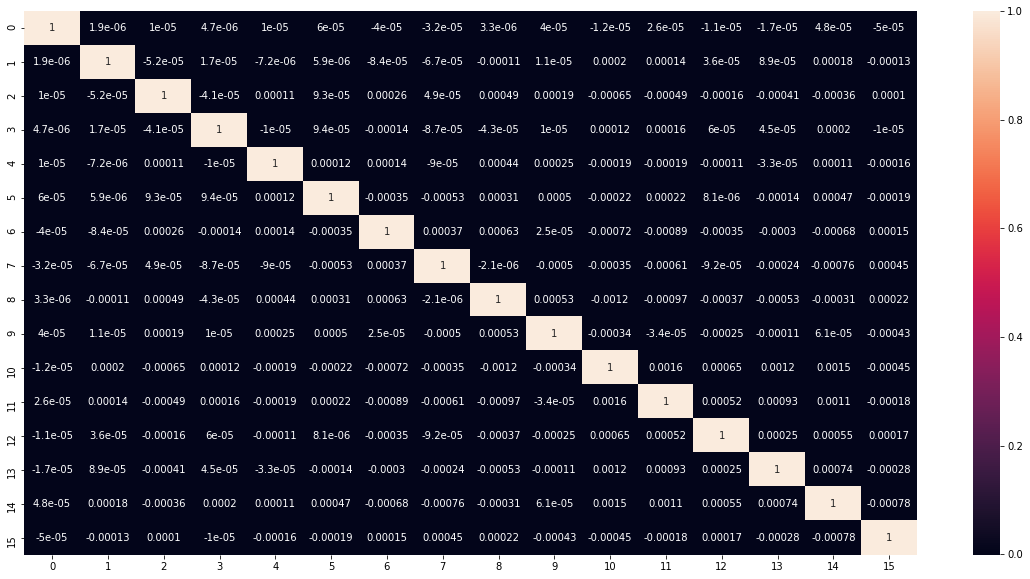

In [220]:
corrmat=np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(20,10))
sns.heatmap(corrmat,annot=True)

In [226]:
#corrmat.diagonal()
#np.diagflat(corrmat.diagonal())
corrmat_nodiag=corrmat-np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.001648041480217722 , min corr:  -0.0012422096979656549


In [227]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1654, 16)

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [229]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.79'

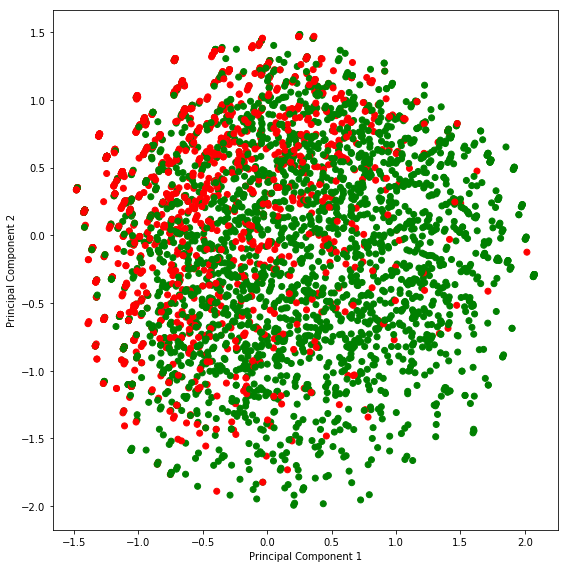

In [231]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()